<a href="https://colab.research.google.com/github/jasonnzhangg2/job-market-analysis-data-analytics-project/blob/main/5_Optimal_Skills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is the most optimal skill to learn for Data Analysts

Show how indemand a skill is vs how much that skill will pay

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

Clean Data

Filter the data to only get Data Analyst jobs from Canada and remove any Null values from salary_year_avg


In [5]:
df_DA_CAN = df[
    (df['job_title_short'] == 'Data Analyst' ) &
    (df['job_country'] == 'Canada')
    ]

df_DA_CAN.dropna(subset=['salary_year_avg'], inplace = True)



/tmp/ipython-input-4027164498.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_DA_CAN.dropna(subset=['salary_year_avg'], inplace = True)


Then get the different skills and the salary of the skills

In [17]:
df_DA_CAN_skills = df_DA_CAN.explode('job_skills')
df_DA_CAN_skills[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
48811,105000.0,sql
48811,105000.0,python
48811,105000.0,javascript
48811,105000.0,bigquery
48811,105000.0,tableau
...,...,...
767858,100500.0,python
767858,100500.0,sas
767858,100500.0,sas
767858,100500.0,excel


### Calculate percent of the jobs with that skill

In [20]:
df_DA_CAN_skillsC = df_DA_CAN_skills.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending = False)

df_DA_CAN_skillsC = df_DA_CAN_skillsC.rename(columns = {'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_CAN)

# pecentage of jobs with that skill
df_DA_CAN_skillsC['percent_of_jobs'] =df_DA_CAN_skillsC['skill_count']/DA_job_count * 100

df_DA_CAN_skillsC

,skill_count,median_salary,percent_of_jobs
job_skills,,,
sql,17,99150.00,54.838710
python,14,99825.00,45.161290
tableau,10,98825.00,32.258065
excel,9,98500.00,29.032258
sas,8,98500.00,25.806452
power bi,5,75000.00,16.129032
vba,4,84500.00,12.903226
sheets,4,99500.00,12.903226
spark,4,109795.25,12.903226


In [36]:
skill_percent = 9

# show only skills that are in more than 10% of postings
df_DA_skills_high_demand = df_DA_CAN_skillsC[df_DA_CAN_skillsC['percent_of_jobs'] >= skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,percent_of_jobs
job_skills,,,
sql,17,99150.00,54.838710
python,14,99825.00,45.161290
tableau,10,98825.00,32.258065
excel,9,98500.00,29.032258
sas,8,98500.00,25.806452
power bi,5,75000.00,16.129032
vba,4,84500.00,12.903226
sheets,4,99500.00,12.903226
spark,4,109795.25,12.903226


Plot the relationship between the skill demand and the median salary for those skills

In [24]:
!pip install adjustText

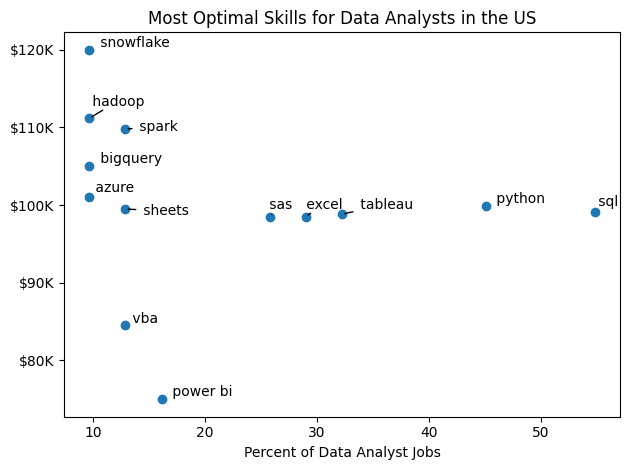

In [37]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['percent_of_jobs'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.title('Most Optimal Skills for Data Analysts in the US')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['percent_of_jobs'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black'))

plt.tight_layout()
plt.show()